In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("googleplaystore.csv")
data = dataset.copy()
data.dropna(inplace=True)#this removes all the rows with atleast one null value,inplace is like conformation

In [3]:
#Cleaning Reviews Column

"""
- in the data 'Reviews' has string 'M' in it stands for million.

- we have to remove the string "M" and "," from values and miltiply with 1000000 if the values has 'M' in it
and finally convert to int.

- this method can clean the Reviewa column.
"""

def filter(per):
    if "M" in str(per) and "," in str(per):
        per = str(per).replace("M","")
        per = per.replace(",","")
        return int(per)*1000000
    elif "M" in str(per):
        per = int(str(per).replace("M",""))
        return per*1000000
    elif "," in str(per):
        per = str(per).replace(",","")
        return int(per)
    
    else:  
        return int(per)

In [4]:
# all the values of column 'Reviews' are passed to filter method
data["Reviews"] =data["Reviews"].apply(filter) 

In [5]:
#Cleaning the Size Column

"""
- using this method to clean "size" column
- size column contains the strings like 
'M' stands for megabyte
"Varies with device"
"k" stands for kilobyte

finally convert every app size to megabytes and return as float type
"""
def filter1(per):
    per = str(per)
    if "M" in per:
        per = per.replace("M","")
        return float(per)
    elif per == "Varies with device":
        return np.NaN
    elif "k" in per:
        return float(per.replace("k",""))/1000
    else:
        return float(per)

In [6]:
data["Size"]=data["Size"].apply(filter1) #applying filter1 function 

In [7]:
#Cleaning Installs Column
"""
this function is used to clean installs column
it removes the string "+" and ","
and returns as int
"""
def filter2(per):
    per = str(per)
    if "+" in per:
        per = per.replace("+","")
    if "," in per:
        per = per.replace(",","")
        
    return int(per)

In [8]:
data["Installs"]=data["Installs"].apply(filter2)#applying filter2 function"

In [10]:
#Cleaning Price Column
"""
using this method to remove the string "$"
and convert the price to Nigerian Naira as floats
"""
def filter3(per):
    per = str(per)
    if "$" in per:
        per=per.split("$")[1]
    return (float(per)*360.50) #Note : this exchange rate of "N360.50" was at Sept 2019.

data["Price"]=data["Price"].apply(filter3)# used to apply filter 3 function

In [18]:
#importing plotly for our visualizations
import plotly
print(plotly.__version__)
%matplotlib inline


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

4.1.1


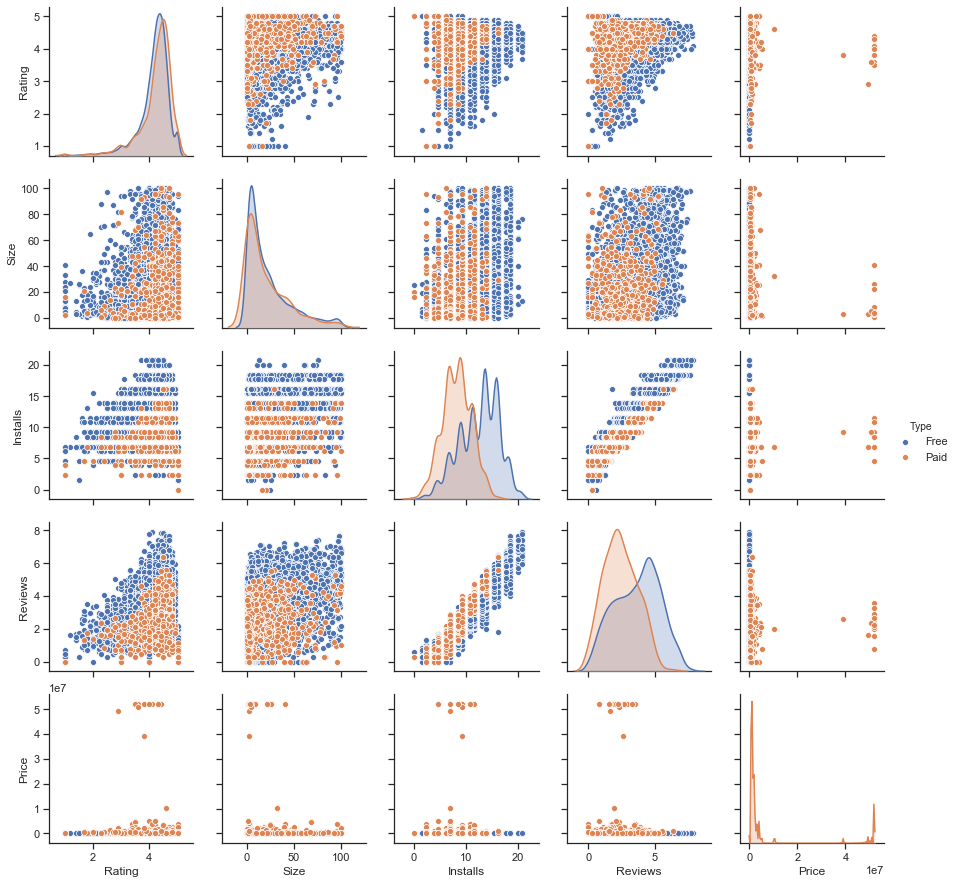

In [24]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(pd.DataFrame(list(zip(data["Rating"],data["Size"],
                                   np.log(data["Installs"]), np.log10(data["Reviews"]),data["Type"], data["Price"])), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')

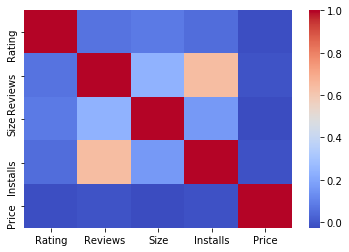

In [21]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [25]:
no_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)

df = [go.Pie(labels = no_of_apps_in_category.index,values = no_of_apps_in_category.values,hoverinfo = 'label+value')]

plotly.offline.iplot(df, filename='active_category')

